# Regression & Its Evaluation

**Question 1: What is Simple Linear Regression?**

**Answer:**  
Simple Linear Regression is a statistical method that models the relationship between a single independent variable (X) and a dependent variable (Y) by fitting a linear equation of the form `Y = a + bX` where `a` is the intercept and `b` is the slope. The model estimates parameters that minimize the sum of squared residuals (differences between observed and predicted Y).

**Question 2: What are the key assumptions of Simple Linear Regression?**

**Answer:**  
1. **Linearity:** The relationship between X and the expected value of Y is linear.  
2. **Independence:** Observations (and residuals) are independent.  
3. **Homoscedasticity:** Constant variance of residuals across values of X (no heteroscedasticity).  
4. **Normality of errors:** The residuals are (approximately) normally distributed (important for inference).  
5. **No perfect multicollinearity:** (In simple regression this is trivial since only one predictor.)  
6. **Correct model specification:** No important predictors are omitted and functional form is correct.

**Question 3: What is heteroscedasticity, and why is it important to address in regression models?**

**Answer:**  
Heteroscedasticity occurs when the variance of the residuals/errors is not constant across levels of the independent variable(s). It matters because:
- It invalidates ordinary least squares (OLS) standard error formulas, leading to unreliable hypothesis tests and confidence intervals.
- Parameter estimates remain unbiased under heteroscedasticity, but inference (p-values, CIs) becomes unreliable.
To address it, we can use transformations (e.g., log), weighted least squares, or robust (heteroscedasticity-consistent) standard errors.

**Question 4: What is Multiple Linear Regression?**

**Answer:**  
Multiple Linear Regression extends simple linear regression by modeling the relationship between a dependent variable Y and multiple independent variables X1, X2, ..., Xp. The model is `Y = β0 + β1 X1 + β2 X2 + ... + βp Xp + ε`. Parameters are typically estimated via OLS to minimize the sum of squared residuals. Multiple regression allows controlling for several predictors and estimating their partial effects on Y.

**Question 5: What is polynomial regression, and how does it differ from linear regression?**

**Answer:**  
Polynomial regression models a nonlinear relationship between X and Y by including polynomial terms of X (e.g., X^2, X^3) while keeping the model linear in the parameters. Example for a quadratic model: `Y = β0 + β1 X + β2 X^2 + ε`. Although it can model curvature, polynomial regression is still linear in coefficients (so OLS applies). It differs from simple linear regression which only includes the first-degree term of X.

Intercept (a): 0.1800
Slope (b): 1.9800


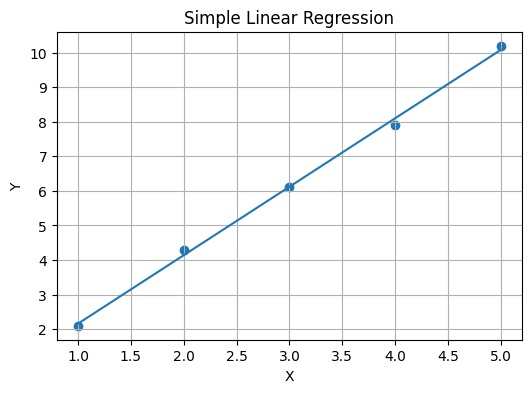

In [4]:

# Q6: Simple Linear Regression
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5], dtype=float)
Y = np.array([2.1,4.3,6.1,7.9,10.2], dtype=float)

X_mean = X.mean()
Y_mean = Y.mean()
b = np.sum((X - X_mean)*(Y - Y_mean)) / np.sum((X - X_mean)**2)
a = Y_mean - b * X_mean
Y_pred = a + b * X

print(f"Intercept (a): {a:.4f}")
print(f"Slope (b): {b:.4f}")

plt.figure(figsize=(6,4))
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.title("Simple Linear Regression")
plt.xlabel("X"); plt.ylabel("Y")
plt.grid(True)
plt.show()


In [3]:

# Q7: Multiple Linear Regression and VIF
import numpy as np

Area = np.array([1200,1500,1800,2000], dtype=float)
Rooms = np.array([2,3,3,4], dtype=float)
Price = np.array([250000,300000,320000,370000], dtype=float)

X = np.column_stack([np.ones_like(Area), Area, Rooms])
y = Price
beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
print("Coefficients (intercept, area, rooms):", beta)

def compute_vif(design_matrix):
    n_preds = design_matrix.shape[1]
    vifs = []
    for i in range(n_preds):
        Xi = design_matrix[:, i]
        X_others = np.delete(design_matrix, i, axis=1)
        X_others = np.column_stack([np.ones(X_others.shape[0]), X_others])
        coef, _, _, _ = np.linalg.lstsq(X_others, Xi, rcond=None)
        Xi_pred = X_others.dot(coef)
        ss_res = ((Xi - Xi_pred)**2).sum()
        ss_tot = ((Xi - Xi.mean())**2).sum()
        R2 = 1 - ss_res/ss_tot if ss_tot != 0 else 0.0
        vif = 1.0 / (1.0 - R2) if (1.0 - R2) != 0 else float('inf')
        vifs.append(vif)
    return vifs

predictors = np.column_stack([Area, Rooms])
vifs = compute_vif(predictors)
print("\nVIFs:")
print("Area:", vifs[0])
print("Rooms:", vifs[1])


Coefficients (intercept, area, rooms): [1.03157895e+05 6.31578947e+01 3.47368421e+04]

VIFs:
Area: 7.736842105263163
Rooms: 7.736842105263156


Coefficients (highest->lowest): [0.2  1.94 0.06]


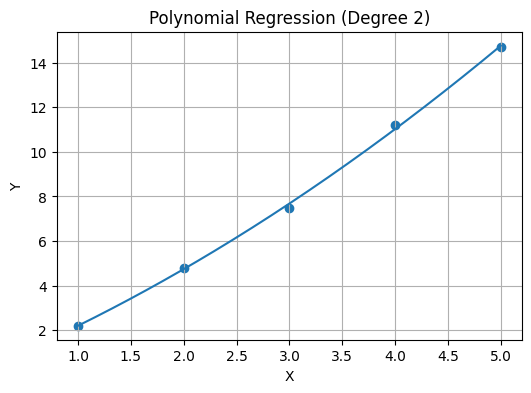

In [2]:

# Q8: Polynomial regression (degree 2)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5], dtype=float)
Y = np.array([2.2,4.8,7.5,11.2,14.7], dtype=float)

coeffs = np.polyfit(X, Y, deg=2)
p = np.poly1d(coeffs)
print("Coefficients (highest->lowest):", coeffs)

X_line = np.linspace(X.min(), X.max(), 200)
plt.figure(figsize=(6,4))
plt.scatter(X, Y)
plt.plot(X_line, p(X_line))
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X"); plt.ylabel("Y")
plt.grid(True)
plt.show()


Intercept: 6.5000, Slope: 1.1500
Residuals: [-3.   5.5 -1.  -2.5  1. ]


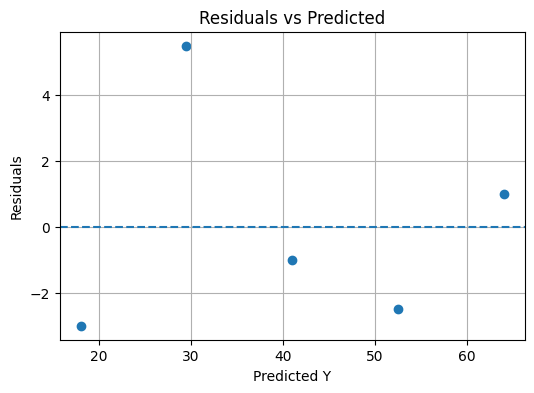

In [1]:

# Q9: Residuals plot and quick heteroscedasticity check
import numpy as np
import matplotlib.pyplot as plt

X = np.array([10,20,30,40,50], dtype=float)
Y = np.array([15,35,40,50,65], dtype=float)

X_mean = X.mean()
Y_mean = Y.mean()
b = np.sum((X - X_mean)*(Y - Y_mean)) / np.sum((X - X_mean)**2)
a = Y_mean - b * X_mean
Y_pred = a + b * X
residuals = Y - Y_pred

print(f"Intercept: {a:.4f}, Slope: {b:.4f}")
print("Residuals:", residuals)

plt.figure(figsize=(6,4))
plt.scatter(Y_pred, residuals)
plt.axhline(0, linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Y"); plt.ylabel("Residuals")
plt.grid(True)
plt.show()


**Question 10: Real-world steps to handle heteroscedasticity and multicollinearity in a house price model**

**Answer:**  
When predicting house prices with features like area, rooms, location and you detect heteroscedasticity and multicollinearity:

**To address heteroscedasticity**
1. **Transform target or predictors** — e.g., log(price) often stabilizes variance.  
2. **Weighted least squares (WLS)** — weight observations inversely to variance.  
3. **Use robust standard errors** (e.g., White's / HC0–HC3) for valid inference.  
4. **Check model specification** — include missing variables or nonlinear terms if needed.

**To address multicollinearity**
1. **Inspect correlation matrix & VIF** to detect problematic predictors.  
2. **Remove or combine collinear variables** (e.g., total_rooms = rooms + bathrooms).  
3. **Use dimensionality reduction** — PCA or partial least squares.  
4. **Regularization** — Ridge (L2) shrinks coefficients and mitigates multicollinearity; Lasso (L1) can also select variables.  

**Other practical steps**
- Use cross-validation to evaluate predictive performance rather than relying only on p-values.
- If location is high-cardinality (many neighborhoods), handle with target encoding or embeddings rather than many dummy variables.
- Report robust metrics and clearly explain transformations (e.g., predictions on log-scale are back-transformed).